### Python module/package imports for this chapter

In [3]:
import math, json, collections, itertools

In [4]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [5]:
from mpl_toolkits.basemap import Basemap
import geopy

### Code and data needed from previous videos

List of olympic cities and years:

In [6]:
cities = []
years = []

for game in open('games.txt','r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')

    cities.append(city)
    years.append(year)

Geolocated olympic-city coordinates (from a JSON file):

In [19]:
coordinates_by_city = json.load(open('coords.json','r'))
coordinates_by_city

{'Amsterdam': [4.89797550561798, 52.3745403],
 'Antwerp': [4.3997081, 51.2211097],
 'Athens': [-82.1012554, 39.3292396],
 'Atlanta': [-84.3901848, 33.7490987],
 'Barcelona': [2.1771353, 41.3825596],
 'Beijing': [116.391248, 39.9059631],
 'Berlin': [13.3888599, 52.5170365],
 'Helsinki': [24.9425683, 60.1674086],
 'London': [-0.1276473, 51.5073219],
 'Los Angeles': [-118.2439408, 34.0543942],
 'Melbourne / Stockholm': [144.9631608, -37.8142175],
 'Mexico': [-99.1333415, 19.4326009],
 'Montreal': [-73.6125179, 45.497684],
 'Moscow': [37.6174976, 55.7506828],
 'Munich': [11.5753822, 48.1371079],
 'Paris': [2.3514992, 48.8566101],
 'Rio': [-43.2093726, -22.9110136],
 'Rome': [12.6308541512038, 41.85233365],
 'Seoul': [126.9782914, 37.5666791],
 'St Louis': [-90.1978888, 38.6272733],
 'Stockholm': [18.0710935, 59.3251172],
 'Sydney': [151.210047, -33.8679573],
 'Tokyo': [139.294774527387, 34.2255804]}

## Comprehensions and generators

In [8]:
for city,year in zip(cities,years):
    if int(year)>1945:
        print(city + ' : '+ year)

London : 1948
Helsinki : 1952
Melbourne / Stockholm : 1956
Rome : 1960
Tokyo : 1964
Mexico : 1968
Munich : 1972
Montreal : 1976
Moscow : 1980
Los Angeles : 1984
Seoul : 1988
Barcelona : 1992
Atlanta : 1996
Sydney : 2000
Athens : 2004
Beijing : 2008
London : 2012
Rio : 2016


In [9]:
# List comprehension

result = [city+ ' : ' + year for city,year in zip(cities,years) if int(year)>1945]

In [10]:
result[:10]

['London : 1948',
 'Helsinki : 1952',
 'Melbourne / Stockholm : 1956',
 'Rome : 1960',
 'Tokyo : 1964',
 'Mexico : 1968',
 'Munich : 1972',
 'Montreal : 1976',
 'Moscow : 1980',
 'Los Angeles : 1984']

In [11]:
# Cities by year (another way of list comprehension results in a dict)
cities_by_year = {year:city for city,year in zip(cities,years)}

In [20]:
cities_by_year

{'1896': 'Athens',
 '1900': 'Paris',
 '1904': 'St Louis',
 '1908': 'London',
 '1912': 'Stockholm',
 '1920': 'Antwerp',
 '1924': 'Paris',
 '1928': 'Amsterdam',
 '1932': 'Los Angeles',
 '1936': 'Berlin',
 '1948': 'London',
 '1952': 'Helsinki',
 '1956': 'Melbourne / Stockholm',
 '1960': 'Rome',
 '1964': 'Tokyo',
 '1968': 'Mexico',
 '1972': 'Munich',
 '1976': 'Montreal',
 '1980': 'Moscow',
 '1984': 'Los Angeles',
 '1988': 'Seoul',
 '1992': 'Barcelona',
 '1996': 'Atlanta',
 '2000': 'Sydney',
 '2004': 'Athens',
 '2008': 'Beijing',
 '2012': 'London',
 '2016': 'Rio'}

In [13]:
cities_after_1930 = {city for year,city in cities_by_year.items() if int(year)>1930}

In [14]:
cities_after_1930

{'Athens',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne / Stockholm',
 'Mexico',
 'Montreal',
 'Moscow',
 'Munich',
 'Rio',
 'Rome',
 'Seoul',
 'Sydney',
 'Tokyo'}

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


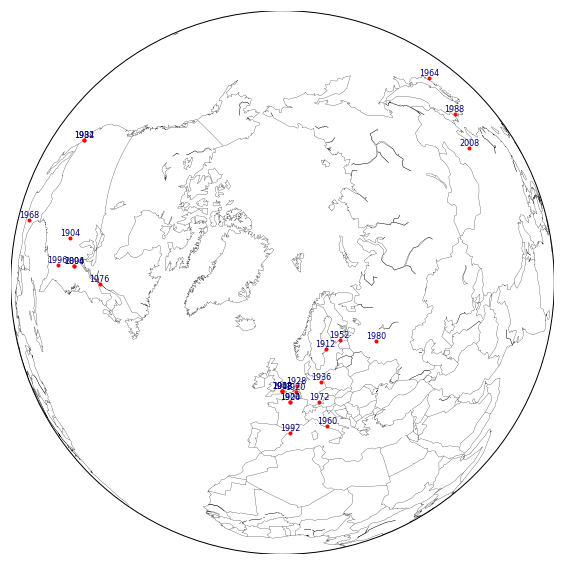

In [22]:
pp.figure(figsize=[10,10])

world = Basemap(projection='ortho',lat_0=75,lon_0=0)

world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for year,city in cities_by_year.items():
    x,y = world(*coordinates_by_city[city])
    
    world.plot(x,y,'r.')
    pp.text(x,y,year,fontsize=8,ha='center',va='bottom',color='navy')
    